# Alphalens: predictive vs. non-predictive factor

This is a very simply notebook in which we use Alphalens to analyse a predictive and a non-predictive factor. The goal is to have exemplifying output for both scenarios to make clear what to expect from Alphalens in the case of a predictive and a non-preditive factor. 

In [1]:
import sys
sys.path.append('/home/bliu/work/alphalens')

In [2]:

import alphalens
import pandas as pd
import numpy as np

/home/bliu/work/py-hft-framework/venv/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Below is a simple mapping of tickers to sectors for a universe of 500 large cap stocks.

In [4]:
ticker_sector = {'A': 4, 'AA': 7, 'AAL': 5, 'AAP': 0, 'AAPL': 6, 'ABBV': 4, 'ABC': 4, 'ABT': 4, 'ACN': 6, 'ADBE': 6, 
'ADI': 6, 'ADM': 1, 'ADP': 6, 'ADS': 6, 'ADSK': 6, 'AEE': 9, 'AEP': 9, 'AES': 9, 'AET': 4, 'AFL': 3, 
'AGN': 4, 'AIG': 3, 'AIV': 3, 'AIZ': 3, 'AJG': 3, 'AKAM': 6, 'ALK': 5, 'ALL': 3, 'ALLE': 5, 'ALXN': 4,
'AMAT': 6, 'AME': 5, 'AMG': 3, 'AMGN': 4, 'AMP': 3, 'AMT': 3, 'AMZN': 0, 'AN': 0, 'ANTM': 4, 'AON': 3,
'APA': 2, 'APC': 2, 'APD': 7, 'APH': 5, 'ATVI': 6, 'AVB': 3, 'AVGO': 6, 'AVY': 7, 'AWK': 9, 'AXP': 3,
'AYI': 5, 'AZO': 0, 'BA': 5, 'BAC': 3, 'BAX': 4, 'BBBY': 0, 'BBT': 3, 'BBY': 0, 'BCR': 4, 'BDX': 4,
'BEN': 3, 'BF-B': 1, 'BHI': 2, 'BIIB': 4, 'BK': 3, 'BLK': 3, 'BLL': 7, 'BMY': 4, 'BRK-B': 3, 'BSX': 4,
'BWA': 0, 'BXP': 3, 'C': 3, 'CA': 6, 'CAG': 1, 'CAH': 4, 'CAT': 5, 'CB': 3, 'CBG': 3, 'CBS': 0, 
'CCI': 3, 'CCL': 0, 'CELG': 4, 'CERN': 4, 'CF': 7, 'CFG': 3, 'CHD': 1, 'CHK': 2, 'CHRW': 5, 'CI': 4,
'CINF': 3, 'CL': 1, 'CLX': 1, 'CMA': 3, 'CMCSA': 0, 'CME': 3, 'CMG': 0, 'CMI': 5, 'CMS': 9, 'CNC': 4,
'CNP': 9, 'COF': 3, 'COG': 2, 'COH': 0, 'COL': 5, 'COP': 2, 'COST': 1, 'CPB': 1, 'CPGX': 2, 'CRM': 6,
'CSCO': 6, 'CSRA': 6, 'CSX': 5, 'CTAS': 5, 'CTL': 8, 'CTSH': 6, 'CTXS': 6, 'CVS': 1, 'CVX': 2, 
'CXO': 2, 'D': 9, 'DAL': 5, 'DD': 7, 'DE': 5, 'DFS': 3, 'DG': 0, 'DGX': 4, 'DHI': 0, 'DHR': 5, 
'DIS': 0, 'DISCA': 0, 'DISCK': 0, 'DLPH': 0, 'DLR': 3, 'DLTR': 0, 'DNB': 5, 'DO': 2, 'DOV': 5, 
'DOW': 7, 'DPS': 1, 'DRI': 0, 'DTE': 9, 'DUK': 9, 'DVA': 4, 'DVN': 2, 'EA': 6, 'EBAY': 6, 'ECL': 7,
'ED': 9, 'EFX': 3, 'EIX': 9, 'EL': 1, 'EMC': 6, 'EMN': 7, 'EMR': 5, 'ENDP': 4, 'EOG': 2, 'EQIX': 6,
'EQR': 3, 'EQT': 2, 'ES': 9, 'ESRX': 4, 'ESS': 3, 'ETFC': 3, 'ETN': 5, 'ETR': 9, 'EW': 4, 'EXC': 9,
'EXPD': 5, 'EXPE': 0, 'EXR': 3, 'F': 0, 'FAST': 5, 'FB': 6, 'FBHS': 5, 'FCX': 7, 'FDX': 5, 'FE': 9, 
'FFIV': 6, 'FIS': 6, 'FISV': 6, 'FITB': 3, 'FL': 0, 'FLIR': 5, 'FLR': 5, 'FLS': 5, 'FMC': 7, 
'FOX': 0, 'FOXA': 0, 'FRT': 3, 'FSLR': 6, 'FTI': 2, 'FTR': 8, 'GAS': 9, 'GD': 5, 'GE': 5, 'GGP': 3,
'GILD': 4, 'GIS': 1, 'GLW': 5, 'GM': 0, 'GOOG': 6, 'GOOGL': 6, 'GPC': 0, 'GPN': 6, 'GPS': 0, 
'GRMN': 0, 'GS': 3, 'GT': 0, 'GWW': 5, 'HAL': 2, 'HAR': 0, 'HAS': 0, 'HBAN': 3, 'HBI': 0, 'HCA': 4,
'HCN': 3, 'HCP': 3, 'HD': 0, 'HES': 2, 'HIG': 3, 'HOG': 0, 'HOLX': 4, 'HON': 5, 'HOT': 0, 'HP': 2,
'HPE': 6, 'HPQ': 6, 'HRB': 3, 'HRL': 1, 'HRS': 6, 'HSIC': 4, 'HST': 3, 'HSY': 1, 'HUM': 4, 'IBM': 6,
'ICE': 3, 'IFF': 7, 'ILMN': 4, 'INTC': 6, 'INTU': 6, 'IP': 7, 'IPG': 0, 'IR': 5, 'IRM': 5, 
'ISRG': 4, 'ITW': 5, 'IVZ': 3, 'JBHT': 5, 'JCI': 0, 'JEC': 5, 'JNJ': 4, 'JNPR': 6, 'JPM': 3, 
'JWN': 0, 'K': 1, 'KEY': 3, 'KHC': 1, 'KIM': 3, 'KLAC': 6, 'KMB': 1, 'KMI': 2, 'KMX': 0, 'KO': 1,
'KORS': 0, 'KR': 1, 'KSS': 0, 'KSU': 5, 'L': 3, 'LB': 0, 'LEG': 5, 'LEN': 0, 'LH': 4, 'LKQ': 0, 
'LLL': 5, 'LLTC': 6, 'LLY': 4, 'LM': 3, 'LMT': 5, 'LNC': 3, 'LOW': 0, 'LRCX': 6, 'LUK': 3, 'LUV': 5,
'LVLT': 8, 'LYB': 7, 'M': 0, 'MA': 6, 'MAC': 3, 'MAR': 0, 'MAS': 5, 'MAT': 0, 'MCD': 0, 'MCHP': 6, 
'MCK': 4, 'MCO': 3, 'MDLZ': 1, 'MDT': 4, 'MET': 3, 'MHK': 0, 'MJN': 1, 'MKC': 1, 'MLM': 7, 'MMC': 3, 
'MMM': 5, 'MNK': 4, 'MNST': 1, 'MO': 1, 'MON': 7, 'MOS': 7, 'MPC': 2, 'MRK': 4, 'MRO': 2, 'MS': 3, 
'MSFT': 6, 'MSI': 6, 'MTB': 3, 'MU': 6, 'MUR': 2, 'MYL': 4, 'NAVI': 3, 'NBL': 2, 'NDAQ': 3, 'NEE': 9,
'NEM': 7, 'NFLX': 6, 'NFX': 2, 'NI': 9, 'NKE': 0, 'NLSN': 5, 'NOC': 5, 'NOV': 2, 'NRG': 9, 'NSC': 5, 
'NTAP': 6, 'NTRS': 3, 'NUE': 7, 'NVDA': 6, 'NWL': 0, 'NWS': 0, 'NWSA': 0, 'O': 3, 'OI': 7, 'OKE': 2, 
'OMC': 0, 'ORCL': 6, 'ORLY': 0, 'OXY': 2, 'PAYX': 6, 'PBCT': 3, 'PBI': 5, 'PCAR': 5, 'PCG': 9, 'PCLN': 0, 
'PDCO': 4, 'PEG': 9, 'PEP': 1, 'PFE': 4, 'PFG': 3, 'PG': 1, 'PGR': 3, 'PH': 5, 
'PHM': 0, 'PKI': 4, 'PLD': 3, 'PM': 1, 'PNC': 3, 'PNR': 5, 'PNW': 9, 'PPG': 7, 
'PPL': 9, 'PRGO': 4, 'PRU': 3, 'PSA': 3, 'PSX': 2, 'PVH': 0, 'PWR': 5, 'PX': 7, 'PXD': 2, 
'PYPL': 6, 'QCOM': 6, 'QRVO': 6, 'R': 5, 'RAI': 1, 'RCL': 0, 'REGN': 4, 'RF': 3, 'RHI': 5, 'RHT': 6, 
'RIG': 2, 'RL': 0, 'ROK': 5, 'ROP': 5, 'ROST': 0, 'RRC': 2, 'RSG': 5, 'RTN': 5, 'SBUX': 0, 'SCG': 9,
'SCHW': 3, 'SE': 2, 'SEE': 7, 'SHW': 7, 'SIG': 0, 'SJM': 1, 'SLB': 2, 'SLG': 3, 'SNA': 0, 'SNI': 0,
'SO': 9, 'SPG': 3, 'SPGI': 3, 'SPLS': 0, 'SRCL': 5, 'SRE': 9, 'STI': 3, 'STJ': 4, 'STT': 3, 'STX': 6,
'STZ': 1, 'SWK': 0, 'SWKS': 6, 'SWN': 2, 'SYF': 3, 'SYK': 4, 'SYMC': 6, 'SYY': 1, 'T': 8, 'TAP': 1,
'TDC': 6, 'TDG': 5, 'TE': 9, 'TEL': 6, 'TGNA': 0, 'TGT': 0, 'TIF': 0, 'TJX': 0, 'TMK': 3, 'TMO': 4,
'TRIP': 0, 'TROW': 3, 'TRV': 3, 'TSCO': 0, 'TSN': 1, 'TSO': 2, 'TSS': 6, 'TWX': 0, 'TXN': 6, 'TXT': 5,
'TYC': 5, 'UA': 0, 'UAL': 5, 'UDR': 3, 'UHS': 4, 'ULTA': 0, 'UNH': 4, 'UNM': 3, 'UNP': 5, 'UPS': 5,
'URBN': 0, 'URI': 5, 'USB': 3, 'UTX': 5, 'V': 6, 'VAR': 4, 'VFC': 0, 'VIAB': 0, 'VLO': 2, 'VMC': 7, 
'VNO': 3, 'VRSK': 5, 'VRSN': 6, 'VRTX': 4, 'VTR': 3, 'VZ': 8, 'WAT': 4, 'WBA': 1, 'WDC': 6, 'WEC': 9,
'WFC': 3, 'WFM': 1, 'WHR': 0, 'WLTW': 3, 'WM': 5, 'WMB': 2, 'WMT': 1, 'WRK': 7, 'WU': 6, 'WY': 3, 
'WYN': 0, 'WYNN': 0, 'XEC': 2, 'XEL': 9, 'XL': 3, 'XLNX': 6, 'XOM': 2, 'XRAY': 4, 'XRX': 6, 'XYL': 5,
 'YHOO': 6, 'YUM': 0, 'ZBH': 4, 'ZION': 3, 'ZTS': 4}

In [21]:
import pandas_datareader.data as web
#pan = web.DataReader(list(ticker_sector.keys()), "yahoo", '2014-12-01')
pan = web.DataReader(ticker_sector.keys()[:30], "yahoo", '2014-12-01')

In [22]:
pan = pan.transpose(2,1,0)

We'll use a naive factor as non-predictive factor, we'll rank stocks based on recent performance: stocks that performed well in the last 3 days will have high rank and vice versa.

In [23]:
non_predictive_factor = pan.loc[:,:,'Open']
non_predictive_factor = non_predictive_factor.pct_change(3)

non_predictive_factor = non_predictive_factor.stack()
non_predictive_factor.index = non_predictive_factor.index.set_names(['date', 'asset'])

To create a predictive factor we'll cheat: we will look at future prices to make sure we'll rank high stoks that will perform well and vice versa.

In [24]:
lookahead_bias_days = 5

predictive_factor = pan.loc[:,:,'Open']
predictive_factor = predictive_factor.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.index.set_names(['date', 'asset'])

The pricing data passed to alphalens should reflect the next available price after a factor value was observed at a given timestamp. The price must not be included in the calculation of the factor for that time. Always double check to ensure you are not introducing lookahead bias to your study.

In our example, before trading starts on 2014-12-2, we observe yesterday, 2014-12-1's factor value. The price we should pass to alphalens is the next available price after that factor observation: the open price on 2014-12-2.

In [25]:
pricing = pan.loc[:,:,'Open'].iloc[1:]

In [26]:
sector_names = {0: 'Consumer Discretionary',
                1: 'Consumer Staples',
                2: 'Energy',
                3: 'Financials',
                4: 'Health Care',
                5: 'Industrials',
                6: 'Information Technology',
                7: 'Materials',
                8: 'Telecommunications Services',
                9: 'Utilities'}

# Run Alphalens on the non-predictive factor

In [12]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(non_predictive_factor, 
                                                                                  pricing, 
                                                                                  quantiles=5,
                                                                                  bins=None,
                                                                                  groupby=ticker_sector,
                                                                                  groupby_labels=sector_names)

In [13]:
alphalens.tears.create_full_tear_sheet(non_predictive_factor_data)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.157535,0.145899,-0.011189,0.023927,689,50.0
5,-0.103847,0.223780,0.007473,0.024229,689,50.0


Returns Analysis


,1,5,10
Ann. alpha,-0.129,-0.064,-0.024
beta,0.001,-0.058,-0.002
Mean Period Wise Return Top Quantile (bps),-5.469,-2.299,-0.941
Mean Period Wise Return Bottom Quantile (bps),5.469,2.297,0.940
Mean Period Wise Spread (bps),-10.937,-4.599,-1.881


Information Analysis


,1,5,10
IC Mean,-0.039,-0.071,-0.086
IC Std.,1.000,0.998,0.997
t-stat(IC),-1.029,-1.870,-2.254
p-value(IC),0.304,0.062,0.024
IC Skew,0.078,0.143,0.172
IC Kurtosis,-1.994,-1.980,-1.970
Ann. IR,-0.622,-1.131,-1.363


Turnover Analysis


,1,5,10
Quantile 1 Mean Turnover,0.288,0.51,0.511
Quantile 2 Mean Turnover,NaN,NaN,NaN
Quantile 3 Mean Turnover,NaN,NaN,NaN
Quantile 4 Mean Turnover,NaN,NaN,NaN
Quantile 5 Mean Turnover,0.288,0.51,0.511


,1,5,10
Mean Factor Rank Autocorrelation,0.424,-0.02,-0.022


# Run Alphalens on the predictive factor

In [27]:
predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(predictive_factor, 
                                                                              pricing, 
                                                                              quantiles=5,
                                                                              bins=None,
                                                                              groupby=ticker_sector,
                                                                              groupby_labels=sector_names)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.495985,0.032928,-0.041618,0.039458,4146,21.015815
2,-0.132507,0.053032,-0.011327,0.019632,3997,20.260543
3,-0.099749,0.074743,0.000898,0.018530,3464,17.558800
4,-0.089106,0.106870,0.013209,0.020132,3996,20.255474
5,-0.069321,0.321252,0.043085,0.037022,4125,20.909367


Returns Analysis


,1,5,10
Ann. alpha,10.731,9.384,2.088
beta,-0.026,0.055,-0.024
Mean Period Wise Return Top Quantile (bps),86.701,83.167,39.266
Mean Period Wise Return Bottom Quantile (bps),-89.755,-86.317,-42.051
Mean Period Wise Spread (bps),176.346,169.478,81.360


Information Analysis


,1,5,10
IC Mean,0.400,1.000000e+00,0.637
IC Std.,0.205,0.000000e+00,0.157
t-stat(IC),51.112,1.286817e+17,106.913
p-value(IC),0.000,0.000000e+00,0.000
IC Skew,-0.427,-1.055000e+00,-0.696
IC Kurtosis,0.025,-1.870000e+00,0.288
Ann. IR,30.866,1.600069e+17,64.564


Turnover Analysis


,1,5,10
Quantile 1 Mean Turnover,0.353,0.768,0.757
Quantile 2 Mean Turnover,0.601,0.794,0.790
Quantile 3 Mean Turnover,0.677,0.801,0.800
Quantile 4 Mean Turnover,0.605,0.788,0.781
Quantile 5 Mean Turnover,0.356,0.783,0.776


,1,5,10
Mean Factor Rank Autocorrelation,0.73,-0.039,-0.01


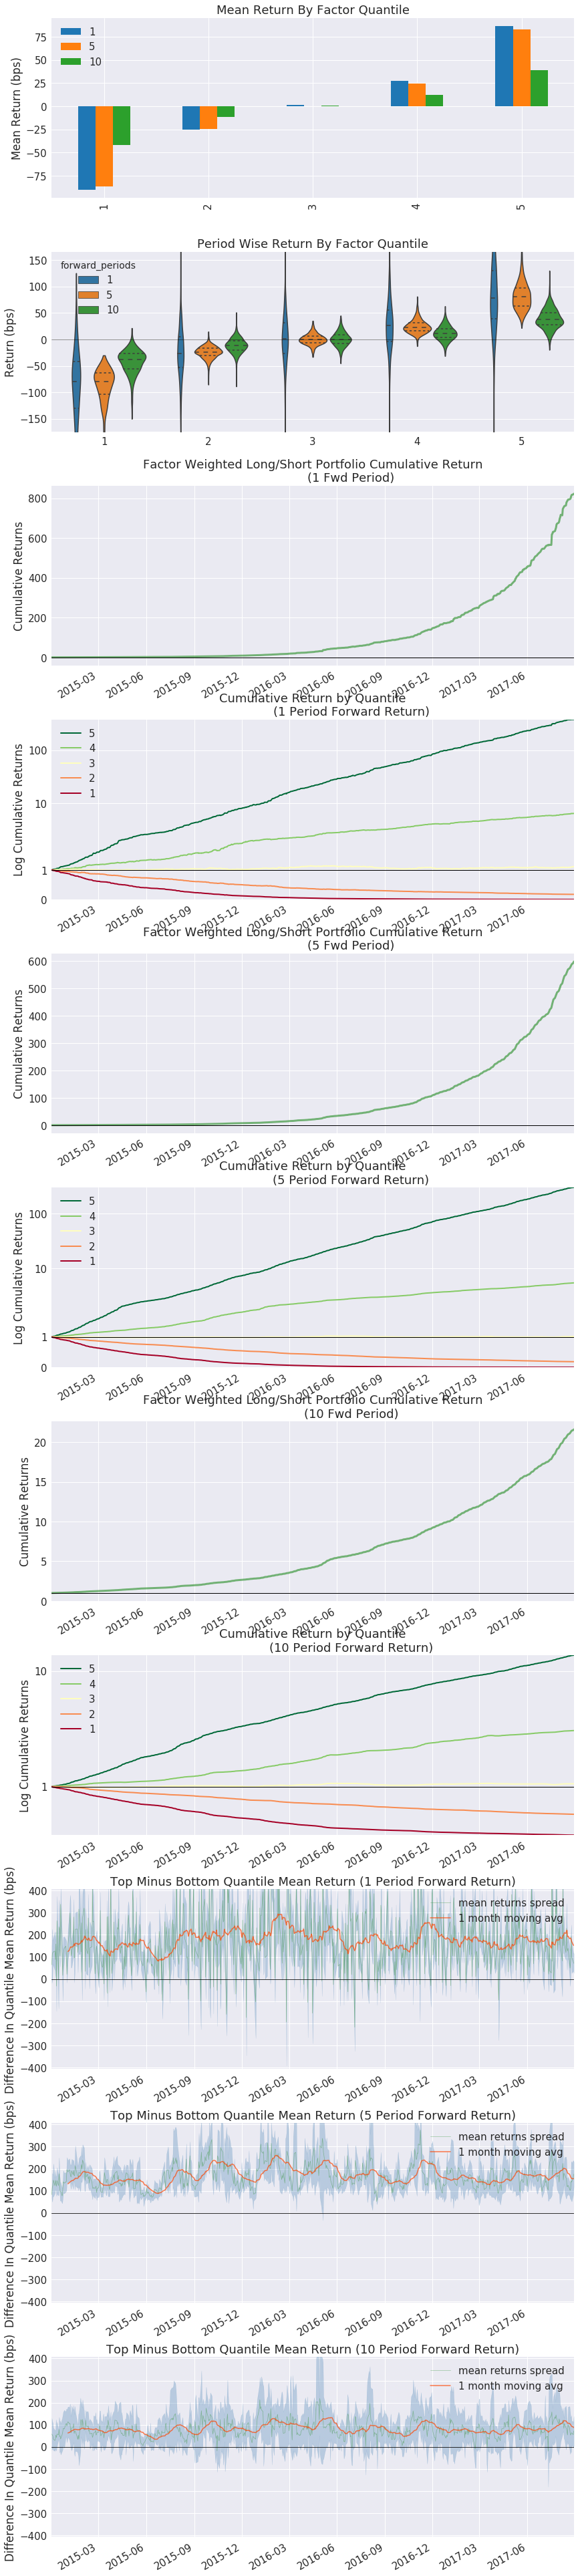

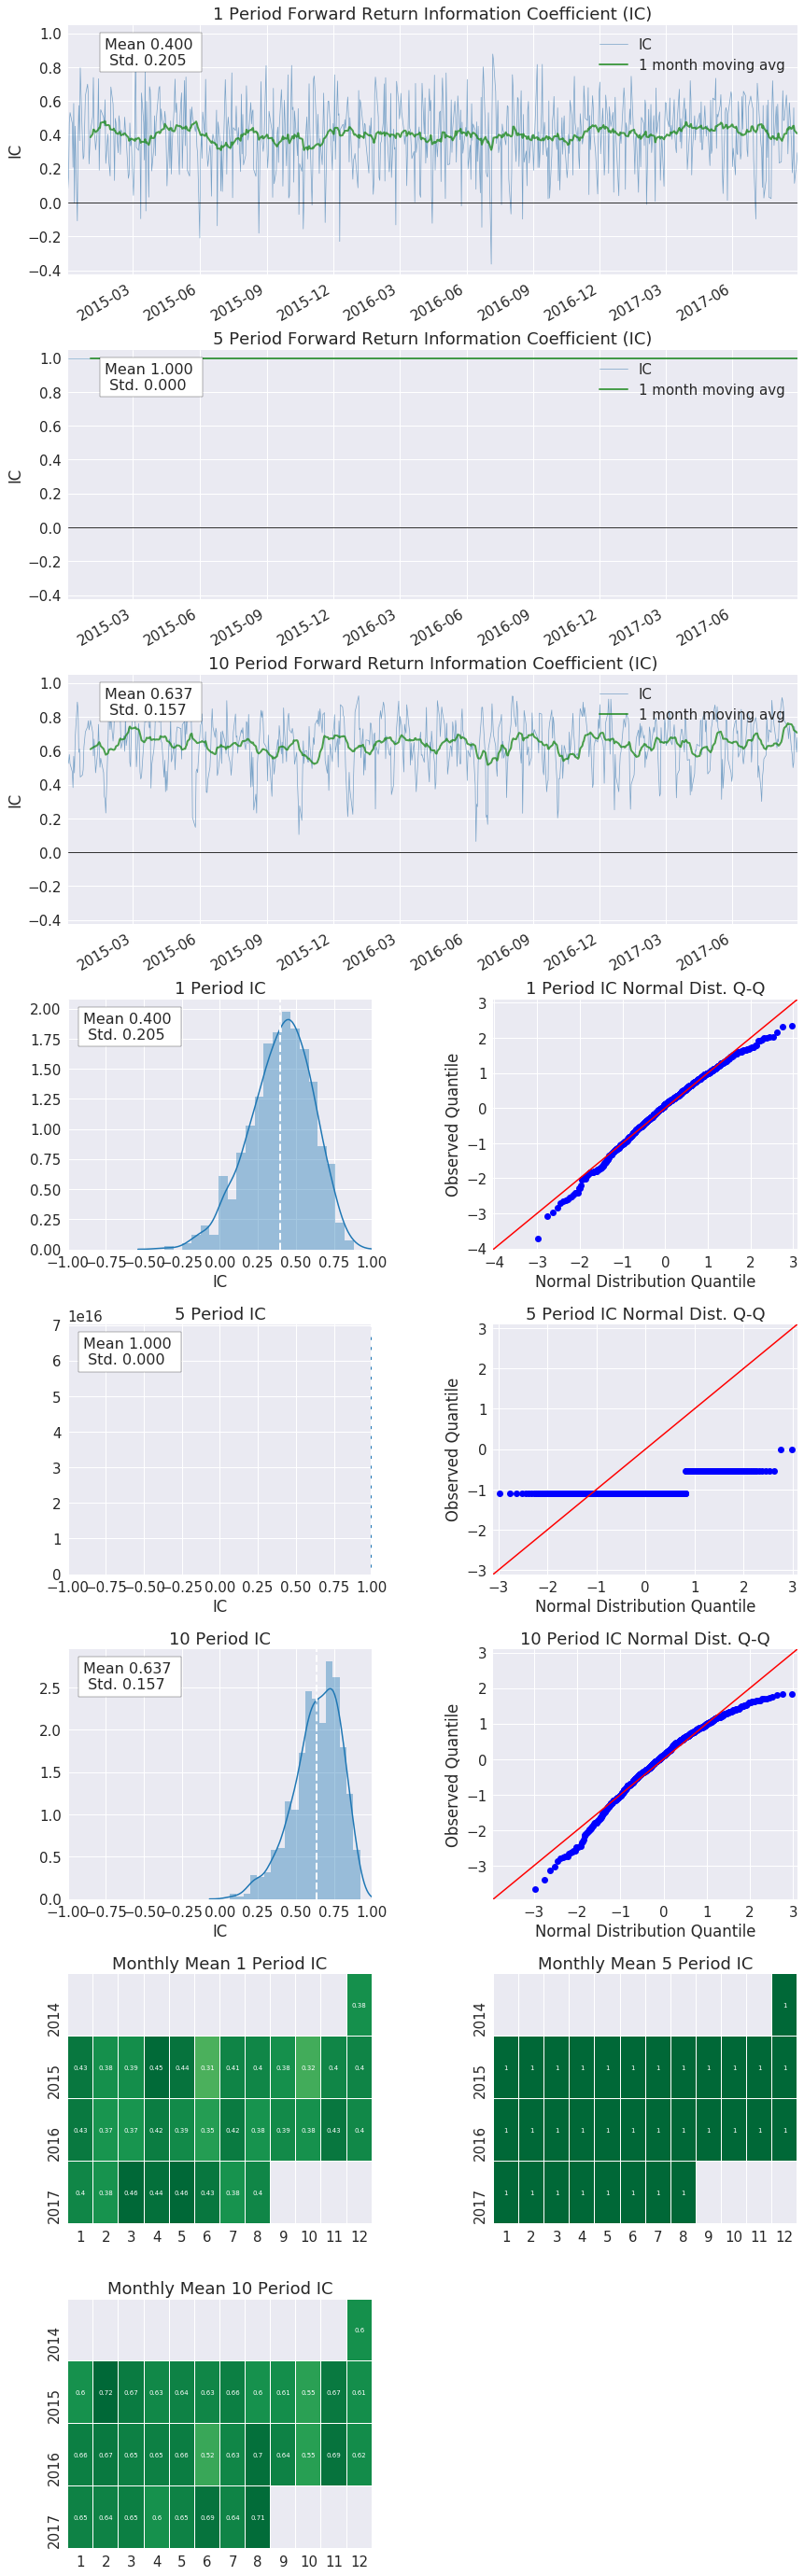

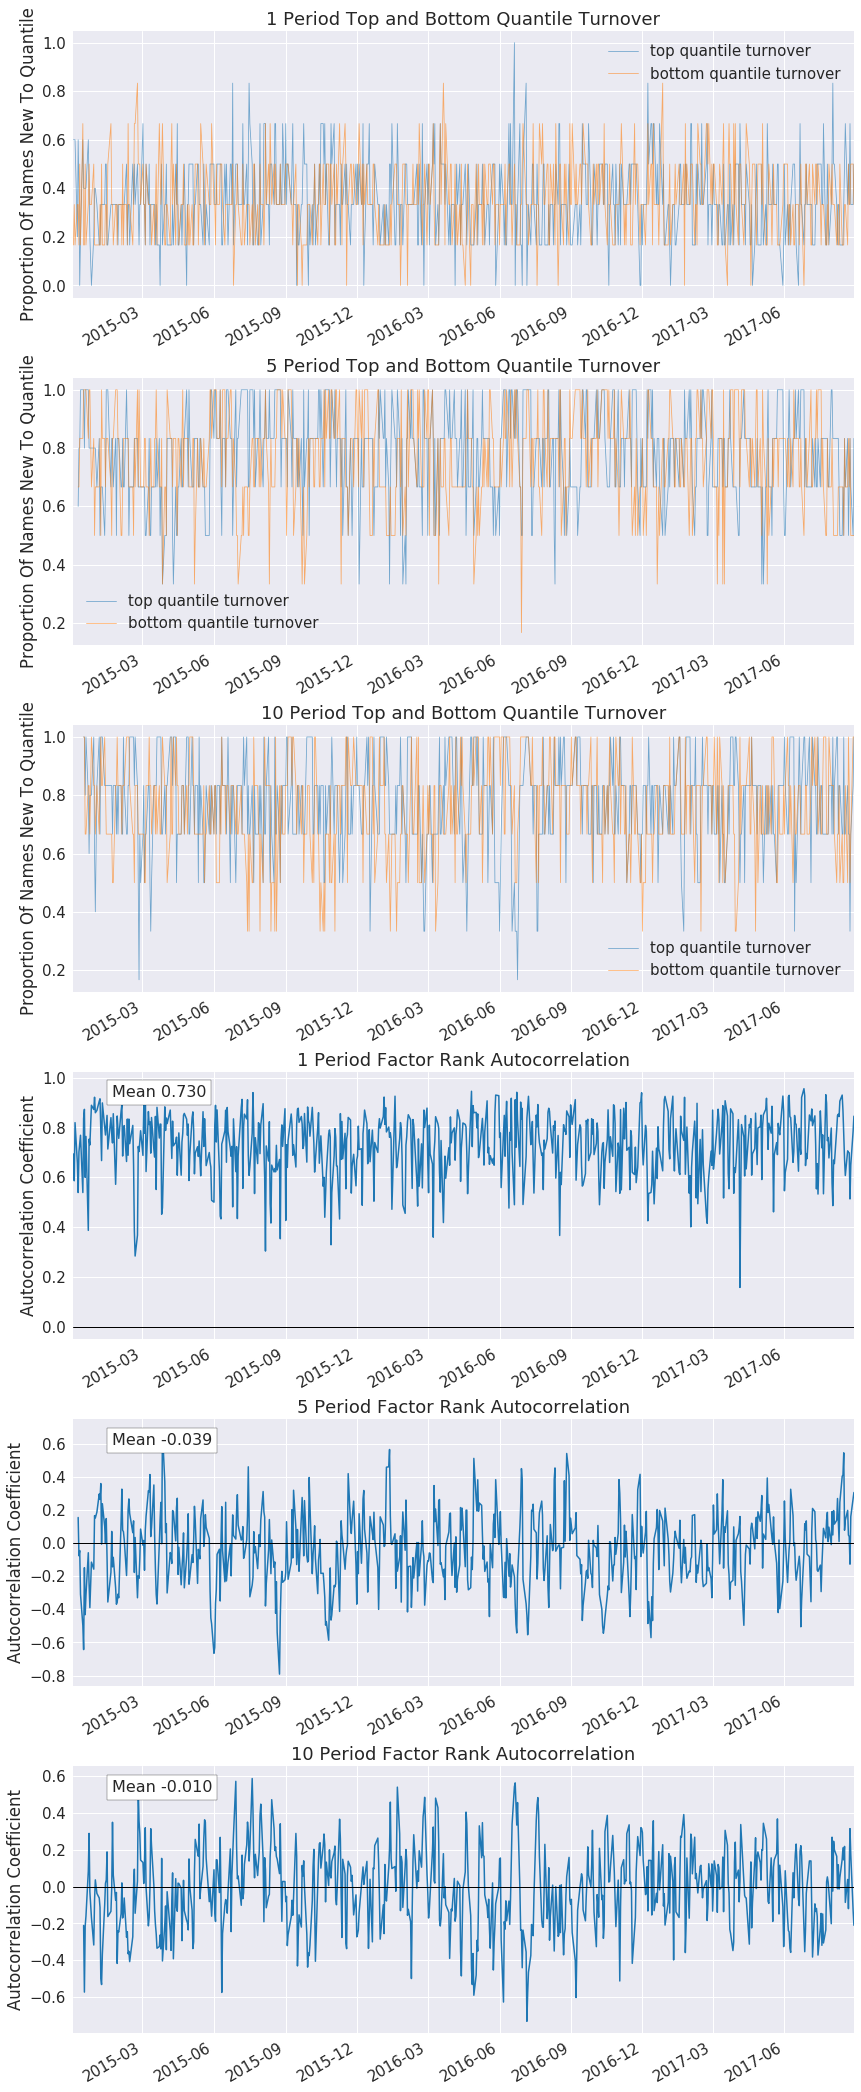

In [28]:
alphalens.tears.create_full_tear_sheet(predictive_factor_data)